In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from main import read_preprocessed_data 

df = read_preprocessed_data()

Income    24
dtype: int64


In [2]:
#odstające dane w Income
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)

IQR = q3 - q1

outliers = df[(df['Income'] < (q1 - 1.5 * IQR)) | (df['Income'] > (q3 + 1.5 * IQR))]

outliers.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
164,1973,PhD,Married,157243.0,0,1,2536,98,20,2,...,22,0,0,0,0,0,0,0,0,0
617,1976,PhD,Together,162397.0,1,1,2807,31,85,1,...,0,1,1,0,0,0,0,0,0,0
655,1975,Graduation,Divorced,153924.0,0,0,2558,81,1,1,...,0,0,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,3110,21,55,16,...,28,1,0,0,0,0,0,0,0,0
1300,1971,Master,Together,157733.0,1,0,2806,37,39,1,...,0,1,1,0,0,0,0,0,0,0


In [3]:
#sprawdzanie wartości skrajnych

outliers_count = []

for col in df.columns[1:]:
    if df[col].dtype in ['int64', 'float64']:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        outliers = df[(df[col] < (q1 - 1.5 * IQR)) | (df[col] > (q3 + 1.5 * IQR))]
        outliers_count.append(outliers.shape[0])
    else:
        outliers_count.append(0)

outliers_df = pd.DataFrame([outliers_count], columns=df.columns[1:])
outliers_df.index = ['Ilość wartości skrajnych']

outliers_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Ilość wartości skrajnych,0,0,8,0,0,0,0,35,226,175,...,23,0,8,163,167,162,143,30,21,332


In [29]:

incl= ['mean','std']
stat_cols = [col for col in df.columns if df[col].nunique()>9]
print(stat_cols)
for col in df.columns:
    if(col not in stat_cols):
        print(col)



['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Education
Marital_Status
Kidhome
Teenhome
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Response


In [30]:
num_cols = pd.DataFrame(df,columns= stat_cols)#df.select_dtypes(include=['int', 'float'])
statystyki = {
'Średnia':num_cols.mean(),
'Mediana':num_cols.median(),
'Minimum':num_cols.min(),
'Maksimum':num_cols.max(),
'Odchylenie Standardowe':num_cols.std(),
'Skośność':num_cols.skew()
}
#statystyki = pd.DataFrame(statystyki).transpose()

In [34]:

other_cols = [col for col in df.columns if col not in stat_cols]

print(other_cols)

['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


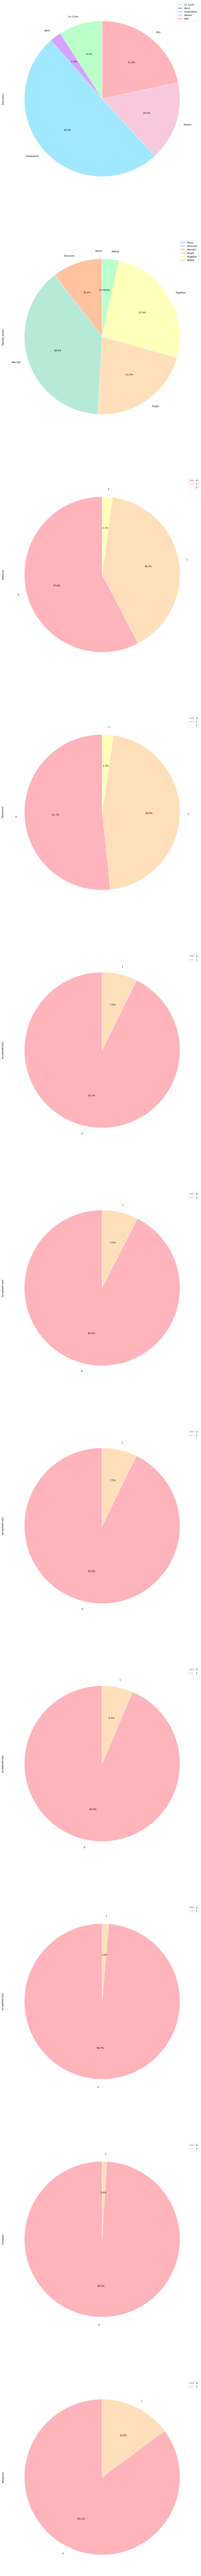

In [71]:
color_pallette = [
    '#FFB3BA',  # Pastel Pink  
    '#FFDFBA',  # Pastel Orange  
    '#FFFFBA',  # Pastel Yellow  
    '#BAFFC9',  # Pastel Green  
    '#BAE1FF',  # Pastel Blue  
    '#D4A5FF',  # Pastel Purple  
    '#FFC3A0',  # Pastel Peach  
    '#A0E8FF',  # Pastel Sky Blue  
    '#B5EAD7',  # Pastel Mint  
    '#F8C8DC',  # Pastel Rose  
]


ax = (
    df[other_cols]
    .astype(str)
    .apply(lambda x: x.value_counts())
    .plot(
        kind="pie",
        subplots=True,
        figsize=(15, 200),
        #the charts have to be so large and split apart because otherwise some percentages and/or legends overlap
        layout=(11,1),
        colors=color_pallette,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=90,
        wedgeprops={'edgecolor': 'white'},
    )
)




 



#plt.tight_layout()
plt.show()

In [8]:
statystyki = pd.DataFrame(statystyki).transpose()

statystyki.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Średnia,1968.796512,52232.510850,0.444991,0.506261,2769.335868,49.147138,303.873435,26.271020,166.924419,37.405188,...,2.659213,5.789356,5.317531,0.072898,0.074687,0.072451,0.063953,0.013417,0.009392,0.148479
Mediana,1970.000000,51381.500000,0.000000,0.000000,2771.000000,49.000000,173.000000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minimum,1893.000000,1730.000000,0.000000,0.000000,2416.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Maksimum,1996.000000,666666.000000,2.000000,2.000000,3115.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Odchylenie Standardowe,11.980604,25187.455359,0.538551,0.544615,202.064179,28.954880,336.876776,39.761356,225.778550,54.436749,...,2.920752,3.253756,2.424756,0.260027,0.262944,0.259291,0.244725,0.115077,0.096477,0.355654
